# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | First our morning flight wa...
1,✅ Trip Verified | Although it was a bit uncom...
2,✅ Trip Verified | Boarding was decently organ...
3,✅ Trip Verified | Boarding on time and departu...
4,✅ Trip Verified | My original flight was canc...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# data cleaning

## 1.1 data inspection/understanding

In [5]:
df.tail()

,reviews
995,✅ Trip Verified | Glasgow to Heathrow. BA are...
996,✅ Trip Verified | London to Phoenix this week...
997,✅ Trip Verified | Glasgow to Heathrow. Very d...
998,✅ Trip Verified | Brussels to Shanghai via Lo...
999,✅ Trip Verified | Chicago to London Heathrow....


In [6]:
# shape of the dataset
df.shape

(1000, 1)

In [7]:
# summary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing data
df.isna().sum()

reviews    0
dtype: int64

## 1.2 data cleaning/preprocessing

In [9]:
# importing necessary libraries for text preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [10]:
# create a function for data cleaning

def clean_reviews(reviews):
    
    # Remove any HTML tags from the description
    reviews = re.sub(r"<[^>]*>", "", reviews)

    # Replace any non-alphabetic characters with a space
    reviews = re.sub(r"[^a-zA-Z]", " ", reviews)

    # Tokenize the description
    tokens = word_tokenize(reviews)

    # Remove any stop words from the reviews
    stop_words = stopwords.words()
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    reviews = " ".join(tokens)

    # Remove any extra whitespace
    reviews = re.sub(r"\s+", " ", reviews).strip()

    # Return the cleaned reviews
    return reviews

In [11]:
# applying the cleaning function on the dataset
df["reviews"] = df["reviews"].apply(
    lambda x: clean_reviews(x)
)

In [12]:
# removing 'Trip Verified' from the dataframe in each entry
df['reviews'] = df['reviews'].str.replace('Trip Verified', '')
# preview
df['reviews'].head()

0     morning flight cancelled moved afternoon flig...
1     bit uncomfortable flight economy flight atten...
2     Boarding decently organised strange configura...
3     Boarding time departure time flight London He...
4     original flight cancelled week actual flight ...
Name: reviews, dtype: object

## 1.3 Exploratory Data Analysis

In [13]:
# import necessary libraries for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
df['reviews']

0       morning flight cancelled moved afternoon flig...
1       bit uncomfortable flight economy flight atten...
2       Boarding decently organised strange configura...
3       Boarding time departure time flight London He...
4       original flight cancelled week actual flight ...
                             ...                        
995     Glasgow Heathrow disgrace stood high standard...
996     London Phoenix week window seat top deck kind...
997     Glasgow Heathrow disappointed British Airways...
998     Brussels Shanghai London Heathrow flight time...
999     Chicago London Heathrow dubious flying especi...
Name: reviews, Length: 1000, dtype: object

(-0.5, 799.5, 599.5, -0.5)

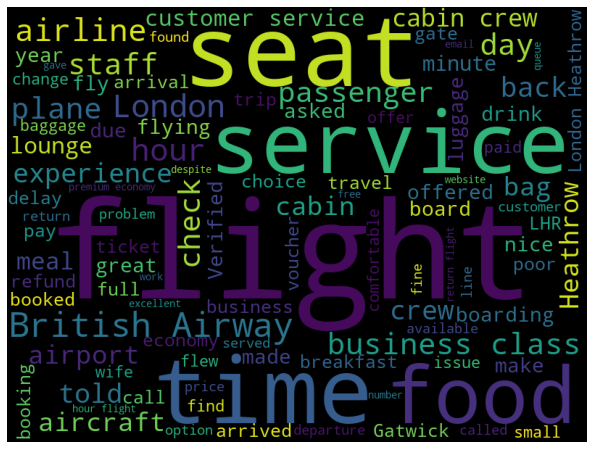

In [31]:
# combine all reviews into a single string
text = ' '.join(review for review in df['reviews'])


# create a wordcloud to inspect the common words in the reviews
wordcloud = WordCloud(max_words=100, width=800, height=600).generate(text)

# plot the WordCloud image                      
plt.figure(figsize = (14, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

most reviews cover areas on flight, service, food, seat, and time.

## 1.4 sentiment analysis using a pre-trained sentiment analysis model

In [28]:
# import necessary libraries
from nltk.sentiment import SentimentIntensityAnalyzer

# download required NLTK data
nltk.download('vader_lexicon')

# instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# apply sentiment analysis to each review in the DataFrame
df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# create new column with sentiment labels based on sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.5 else ('negative' if x < 0 else 'neutral'))

# display DataFrame with reviews and corresponding sentiment labels
print(df[['reviews', 'sentiment']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               reviews sentiment
0     morning flight cancelled moved afternoon flig...  negative
1     bit uncomfortable flight economy flight atten...   neutral
2     Boarding decently organised strange configura...  positive
3     Boarding time departure time flight London He...   neutral
4     original flight cancelled week actual flight ...   neutral
..                                                 ...       ...
995   Glasgow Heathrow disgrace stood high standard...  negative
996   London Phoenix week window seat top deck kind...  positive
997   Glasgow Heathrow disappointed British Airways...  negative
998   Brussels Shanghai London Heathrow flight time...   neutral
999   Chicago London Heathrow dubious flying especi...  positive

[1000 rows x 2 columns]


In [29]:
# preview
df.head()

,reviews,sentiment_score,sentiment
0,morning flight cancelled moved afternoon flig...,-0.8720,negative
1,bit uncomfortable flight economy flight atten...,0.0516,neutral
2,Boarding decently organised strange configura...,0.9042,positive
3,Boarding time departure time flight London He...,0.4767,neutral
4,original flight cancelled week actual flight ...,0.3818,neutral


## 1.4 visual representation of sentiments

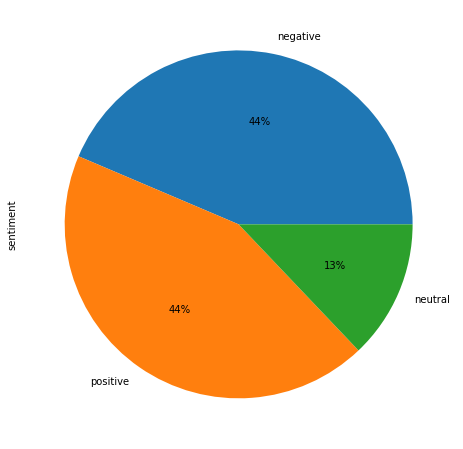

In [32]:
# create a pie chart for sentiments
fig, ax = plt.subplots(figsize=(12,8))
df['sentiment'].value_counts().plot(kind='pie', autopct='%.0f%%');